In [9]:
import numpy as np
from scipy.ndimage import gaussian_filter
import tqdm
from tqdm import trange, tqdm
N=256
n=np.arange(7)
Rsall=1/2*np.sqrt(2)**n

In [18]:
nd=np.load("/data/dell5/userdir/heyi/EAGLE/5.21_gu_256.npy")
ave=np.sum(nd)/N/N/N
nd=(nd-ave)/ave
def w_vcount(i):

Rs=1.25
#网格数目
#空网格加上平均数密度
deltk=np.fft.fftn(nd) #傅里叶转换

s=1.5*(0.307-0.0455)*0.6777**2*10**4
v=2*np.pi/67.77            #2*pi/L L为box长度
a=np.fft.fftfreq(N,1./N)

nx=a[:,None,None]+np.zeros_like(a[None,:,None])+np.zeros_like(a[None,None,:])
ny=a[None,:,None]+np.zeros_like(a[:,None,None])+np.zeros_like(a[None,None,:])
nz=a[None,None,:]+np.zeros_like(a[:,None,None])+np.zeros_like(a[None,:,None])

deltk=deltk/(np.sinc(nx/N)*np.sinc(ny/N)*np.sinc(nz/N))**2

k=np.sqrt((v*nx)**2+(v*ny)**2+(v*nz)**2)
deltk=deltk*np.exp(-0.5*k*k*Rs**2)

fik=s*deltk/(-k**2)
#fik=fik*np.exp(-0.5*k*k*100)#直接求T 二阶偏导
fik[0,0,0]=0.0

h11=-fik*v*nx*v*nx
h12=h21=-fik*v*nx*v*ny
h13=h31=-fik*v*nx*v*nz
h22=-fik*v*ny*v*ny
h23=h32=-fik*v*ny*v*nz
h33=-fik*v*nz*v*nz

h11=np.fft.ifftn(h11)
h12=h21=np.fft.ifftn(h12)
h13=h31=np.fft.ifftn(h13)
h22=np.fft.ifftn(h22)
h23=h32=np.fft.ifftn(h23)
h33=np.fft.ifftn(h33)

h11=h11.reshape(N**3,1).real
h12=h21=h12.reshape(N**3,1).real
h13=h31=h13.reshape(N**3,1).real
h22=h22.reshape(N**3,1).real
h23=h32=h23.reshape(N**3,1).real
h33=h33.reshape(N**3,1).real


ten=np.hstack((h11,h12,h13,h21,h22,h23,h31,h32,h33)).reshape(-1,3,3)
ten=np.array(ten,dtype=np.float32)
lm,l=np.linalg.eig(ten)
lmdn=np.ones((N**3,12),dtype=np.float32)
lmdn[:,0]=lm[:,0]
lmdn[:,1:4]=l[:,:,0]
lmdn[:,4]=lm[:,1]
lmdn[:,5:8]=l[:,:,1]
lmdn[:,8]=lm[:,2]
lmdn[:,9:12]=l[:,:,2]


s=1.5*(0.307-0.0455)*0.6777**2*10**4

eig=lmdn
eig[:,0]=eig[:,0]/s
eig[:,4]=eig[:,4]/s
eig[:,8]=eig[:,8]/s

print (1)
lmd=np.zeros((N**3,3),dtype=np.float)
n1=np.zeros((N**3,3),dtype=np.float)
n2=np.zeros((N**3,3),dtype=np.float)
n3=np.zeros((N**3,3),dtype=np.float)

lmd[:,0]=eig[:,0]
lmd[:,1]=eig[:,4]
lmd[:,2]=eig[:,8]

print(2) 
n1[:,0:3]=eig[:,1:4]
n2[:,0:3]=eig[:,5:8]
n3[:,0:3]=eig[:,9:12]
print(3)


    #np.save('/data/dell5/userdir/hy/EAGLE_NEXUSw_256_'+Rsstr+'smooth_200911.npy',lmd)
    #np.save('/data/dell5/userdir/hy/EAGLE_NEXUSv_256_'+Rsstr+'smooth_200911.npy',v)    

In [27]:

Rth=0.25
a=w>Rth

print(4)
b=a[:,:,:,0]*2**2+a[:,:,:,1]*2+a[:,:,:,2]*1
c=(b==7)*3
f=((b==6)|(b==5)|(b==3))*2
s=((b==4)|(b==2)|(b==1))*1
v=(b==0)*0

fil=c+f+s+v

lmd=lmd.reshape(N,N,N,3)
v=np.zeros([N,N,N,3,3])
v[0:N,0:N,0:N,0,0:3]=n1.reshape(N,N,N,3)
v[0:N,0:N,0:N,1,0:3]=n2.reshape(N,N,N,3)
v[0:N,0:N,0:N,2,0:3]=n3.reshape(N,N,N,3)


4


In [12]:
np.save('/data/dell5/userdir/hy/EAGLE_NEXUSw_256_'+np.str(i)+'smooth_200914.npy',w)
np.save('/data/dell5/userdir/hy/EAGLE_NEXUSv_256_'+np.str(i)+'smooth_200914.npy',v)  
np.save('/data/dell5/userdir/hy/EAGLE_NEXUSfil_256_'+np.str(i)+'smooth_200914.npy',fil)


  0%|          | 0/7 [00:00<?, ?it/s]/home/heyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/heyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/heyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


1
2
3



 14%|█▍        | 1/7 [04:32<27:17, 272.93s/it]

1
2
3



 29%|██▊       | 2/7 [08:18<21:33, 258.68s/it]

1
2
3



 43%|████▎     | 3/7 [11:52<16:21, 245.35s/it]

1
2
3



 57%|█████▋    | 4/7 [15:29<11:50, 236.74s/it]

1
2
3



 71%|███████▏  | 5/7 [18:59<07:37, 228.65s/it]

1
2
3



 86%|████████▌ | 6/7 [22:22<03:41, 221.17s/it]

1
2
3



100%|██████████| 7/7 [25:51<00:00, 217.42s/it]


In [26]:
np.shape(w)

(256, 256, 256, 3)

In [36]:
 w,v=w_vcount(1)

/home/heyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/heyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


1
2
3


In [30]:
np.save('/data/dell5/userdir/hy/EAGLEw_256_1smoothheyi200914.npy',w)
np.save('/data/dell5/userdir/hy/EAGLEv_256_1smoothheyi200914.npy',v)
np.save('/data/dell5/userdir/hy/EAGLEv_256_threshold0.5_1smoothheyi200914.npy',fil)

In [37]:
np.save('/data/dell5/userdir/hy/EAGLEv_256_1smoothheyi200914.npy',v)

In [38]:
lmd=lmd.reshape(N,N,N,3)
v=np.zeros([N,N,N,3,3])
v[0:N,0:N,0:N,0,0:3]=n1.reshape(N,N,N,3)
v[0:N,0:N,0:N,1,0:3]=n2.reshape(N,N,N,3)
v[0:N,0:N,0:N,2,0:3]=n3.reshape(N,N,N,3)

In [39]:
fil=fil.reshape(N,N,N)
c=fil
voidpos=np.where(c==0)
sheetpos=np.where(c==1)
filpos=np.where(c==2)
clusterpos=np.where(c==3)

-996461445766118.2 122547091643268.2 449998866902235.3 423915487220614.9


In [53]:
np.save('/data/dell5/userdir/hy/EAGLEfil_256_1.6smooth_0.8Rs_heyi200910.npy',fil)

In [54]:
np.save('/data/dell5/userdir/hy/EAGLEw_256_1.6smooth_0.8Rs_heyi200910.npy',lmd)
np.save('/data/dell5/userdir/hy/EAGLEv_256_1.6smooth_0.8Rs_heyi200910.npy',v)

In [21]:
import numpy as np
w=np.load('/data/dell5/userdir/hy/EAGLE_NEXUSw_256_'+np.str(6)+'smooth_200911.npy')

In [22]:
w

array([[[[-2.83131450e-01, -1.65203989e-01, -2.29969397e-02],
         [-2.86757708e-01, -1.61643907e-01, -1.94934197e-02],
         [-2.90704459e-01, -1.58527404e-01, -1.58095285e-02],
         ...,
         [-2.74491519e-01, -1.78119108e-01, -3.23093869e-02],
         [-2.76958495e-01, -1.73503995e-01, -2.94102374e-02],
         [-2.79853433e-01, -1.69174597e-01, -2.63053421e-02]],

        [[-2.79789031e-01, -1.61979094e-01, -1.06266811e-02],
         [-2.83516139e-01, -1.58519968e-01, -6.78134244e-03],
         [-2.87563801e-01, -1.55489534e-01, -2.80472334e-03],
         ...,
         [-2.70825952e-01, -1.74580291e-01, -2.11946182e-02],
         [-2.73406684e-01, -1.70062259e-01, -1.78462919e-02],
         [-2.76408374e-01, -1.65840849e-01, -1.43201929e-02]],

        [[-2.76466638e-01, -1.58965409e-01,  1.60337752e-03],
         [-2.80290991e-01, -1.55609265e-01,  5.76031394e-03],
         [-2.84435868e-01, -1.52665630e-01,  9.99972783e-03],
         ...,
         [-2.67191648e-0

/home/heyi/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


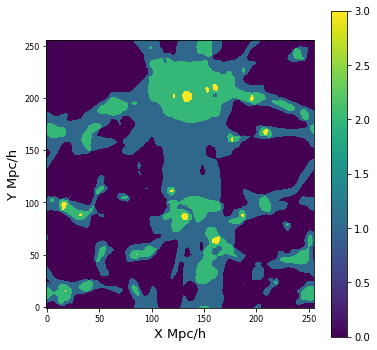

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
N=256

fil=fil.reshape(N,N,N)
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))
a=fil[40:45,:,:]
#a=fil[:,60:64,:]
#a=fil[:,:,310:314]
b=np.max(a,axis=0)
#x=a.mean(axis=0)
#plt.imshow(x)

plt.imshow(b)
plt.colorbar()

#plt.gca().invert_yaxis()
#plt.imshow(x,cmap='Greys')


font1 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'   : 14,

}
font2 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'   : 13,

}
ax = plt.gca()    
ax.invert_yaxis()  
ax.tick_params(axis='both', which='major', labelsize=8)
 
plt.xlabel("X Mpc/h",font2)
plt.ylabel("Y Mpc/h",font2)
plt.show()


/home/heyi/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


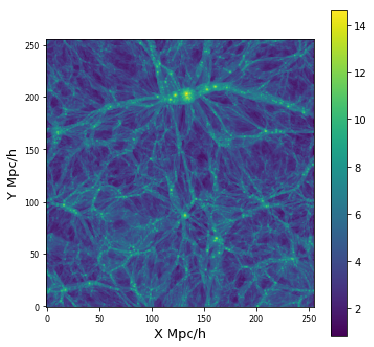

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
N=256
fil=np.load("/data/dell5/userdir/heyi/EAGLE/5.21_gu_256.npy")
fil=fil.reshape(N,N,N)
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))
a=fil[40:45,:,:]
#a=fil[:,60:64,:]
#a=fil[:,:,310:314]
b=np.max(a,axis=0)
#x=a.mean(axis=0)
#plt.imshow(x)

plt.imshow(np.log(b))
plt.colorbar()

#plt.gca().invert_yaxis()
#plt.imshow(x,cmap='Greys')


font1 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'   : 14,

}
font2 = {'family' : 'Times New Roman',

'weight' : 'normal',

'size'   : 13,

}
ax = plt.gca()    
ax.invert_yaxis()  
ax.tick_params(axis='both', which='major', labelsize=8)
 
plt.xlabel("X Mpc/h",font2)
plt.ylabel("Y Mpc/h",font2)
plt.show()
